In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

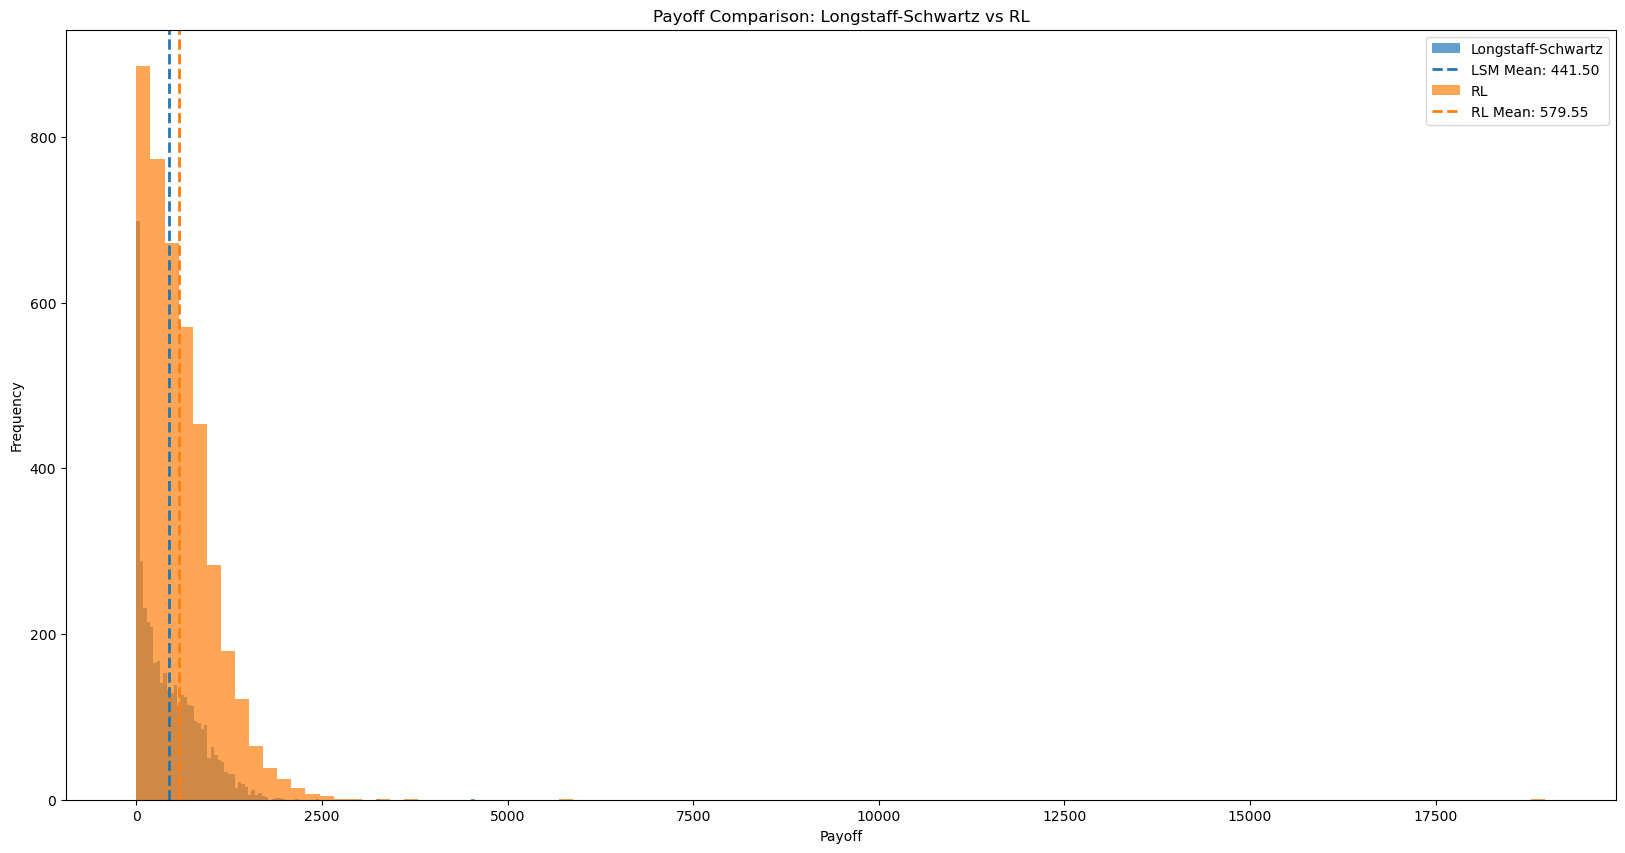

Longstaff-Schwartz Mean Payoff: 441.50
RL Mean Payoff: 579.55


In [ ]:
# for the LSM 
lsm = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/MonthlySwing_d/evaluation_runs/longstaff_schwartz_solution.csv')

# Get the payoff data
lsm_payoffs = lsm.groupby('episode_idx')['reward'].sum()

# Create the plot with PDF (density=True) and KDE
fig, ax = plt.subplots(figsize=(20, 10))

# Plot histogram as PDF for LSM
ax.hist(lsm_payoffs, bins=100, density=True, alpha=0.7, color='tab:blue', label='Longstaff-Schwartz PDF')

# Add KDE for LSM
lsm_payoffs.plot.kde(ax=ax, color='tab:blue', linewidth=2, linestyle='-', label='Longstaff-Schwartz KDE')

# Add vertical line for LSM mean
lsm_mean = lsm_payoffs.mean()
ax.axvline(lsm_mean, color='tab:blue', linestyle='--', linewidth=2, label=f'LSM Mean: {lsm_mean:.2f}')

# for the RL
rl = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/MonthlySwing_d/evaluation_runs/eval_run_16384.csv')

# Get the payoff data
rl_payoffs = rl.groupby('episode_idx')['reward'].sum()

# Plot histogram as PDF for RL
ax.hist(rl_payoffs, bins=100, density=True, alpha=0.7, color='tab:orange', label='RL PDF')

# Add KDE for RL
rl_payoffs.plot.kde(ax=ax, color='tab:orange', linewidth=2, linestyle='-', label='RL KDE')

# Add vertical line for RL mean
rl_mean = rl_payoffs.mean()
ax.axvline(rl_mean, color='tab:orange', linestyle='--', linewidth=2, label=f'RL Mean: {rl_mean:.2f}')

plt.title('Payoff Comparison: Longstaff-Schwartz vs RL (PDF + KDE)')
plt.legend()
plt.xlabel('Payoff')
plt.ylabel('Density')
plt.show()

# Print the mean of each method
print(f"Longstaff-Schwartz Mean Payoff: {lsm_mean:.2f}")
print(f"RL Mean Payoff: {rl_mean:.2f}")


In [7]:
lsm.groupby('episode_idx').sum().describe()

,step,spot,q_remain,q_exerc,time_left,action,q_actual,reward
count,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000
mean,214.820068,2523.289369,315.446777,107.966309,0.950069,16.134277,16.134277,441.502195
std,30.297138,296.463410,55.964821,37.797634,0.021917,4.302430,4.302430,402.349117
min,55.000000,1240.010300,110.000000,2.000000,0.708000,2.000000,2.000000,0.000000
25%,210.000000,2325.796050,280.000000,82.000000,0.954100,14.000000,14.000000,99.638930
50%,231.000000,2517.971300,320.000000,112.000000,0.957900,18.000000,18.000000,342.796567
75%,231.000000,2718.389350,358.000000,130.000000,0.957900,20.000000,20.000000,699.127641
max,231.000000,4321.101500,438.000000,264.000000,0.957900,20.000000,20.000000,4558.745750


In [8]:
rl.groupby('episode_idx').sum().describe()

,step,spot,q_remain,q_exerc,time_left,action,q_actual,reward
count,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000
mean,230.477539,2668.302845,320.907078,118.594875,0.957904,9.470161,18.791684,579.547090
std,3.331939,426.720492,12.329208,11.551276,0.000632,0.663074,1.131054,541.823881
min,190.000000,1533.366600,263.639300,66.614100,0.946600,7.050449,14.100900,0.000000
25%,231.000000,2387.840500,313.572000,111.010875,0.958000,9.032052,18.064100,222.092881
50%,231.000000,2628.704400,321.247950,118.670050,0.958000,9.490863,18.981850,488.028260
75%,231.000000,2904.325025,328.974125,125.851775,0.958000,9.962422,19.924900,821.680327
max,231.000000,12710.065200,373.385900,176.360700,0.958000,10.994787,20.000300,18979.712473
